In [1]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import file
df = pd.read_csv('/content/amazon.csv')

DATA PREPROCESSING

In [3]:
# Take a look at the data
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
# Check for data type
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [5]:
# Check for num of rows and columns
df.shape

(1465, 16)

In [6]:
# Replace string value and change data type
df['actual_price'] = df['actual_price'].str.replace('₹','')
df['actual_price'] = df['actual_price'].str.replace(',','').astype('float64')

df['discounted_price'] = df['discounted_price'].str.replace('₹','')
df['discounted_price'] = df['discounted_price'].str.replace(',','').astype('float64')

In [7]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')
df['discount_percentage'] = df['discount_percentage']/100

In [8]:
df['rating_count'] = df['rating_count'].str.replace(',','').astype('float64')

In [9]:
df['rating'].value_counts()

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

In [10]:
# Look at the strange row
df[df['rating'] == '|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


I access to the product page through product_link and find the product rating as 4.0

In [11]:
df['rating'] = df['rating'].str.replace('|','4.0').astype('float64')

<ipython-input-11-f5b4f6e0d9f7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['rating'] = df['rating'].str.replace('|','4.0').astype('float64')


This data set consists of 16 columns but in this notebook i do not use all these so i will choose some columns for analyzing.

In [12]:
# Create new data frame with selected columns
df1 = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()

In [13]:
# Split `category` column
cat_split = df1['category'].str.split('|', expand=True)
cat_split.isnull().sum()

0       0
1       0
2       8
3     165
4     943
5    1380
6    1452
dtype: int64

In [14]:
# Rename column
cat_split = cat_split.rename(columns={0:'Main category', 1:'Sub category'})

In [15]:
# Add new cols to data frame and drop the old ones
df1['Main category'] = cat_split['Main category']
df1['Sub category'] = cat_split['Sub category']
df1.drop(columns ='category', inplace=True)
df1

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,Main category,Sub category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers&Accessories,Accessories&Peripherals
...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,Home&Kitchen,Kitchen&HomeAppliances
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,Home&Kitchen,Kitchen&HomeAppliances
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0,Home&Kitchen,"Heating,Cooling&AirQuality"
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,0.26,4.0,8031.0,Home&Kitchen,"Heating,Cooling&AirQuality"


In [16]:
df1['Main category'].value_counts()

Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: Main category, dtype: int64

In [17]:
# Fix the strings in `Main category`
df1['Main category'] = df1['Main category'].str.replace('&', ' & ')
df1['Main category'] = df1['Main category'].str.replace('OfficeProducts', 'Office Products')
df1['Main category'] = df1['Main category'].str.replace('MusicalInstruments', 'Musical Instruments')
df1['Main category'] = df1['Main category'].str.replace('HomeImprovement', 'Home Improvement')

In [18]:
df1['Sub category'].value_counts()

Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Electrical                                   2
Monitors                                     2
Microphones  

In [19]:
# I will do the same with `Sub category`
df1['Sub category'] = df1['Sub category'].str.replace('&', ' & ')
df1['Sub category'] = df1['Sub category'].str.replace(',', ', ')
df1['Sub category'] = df1['Sub category'].str.replace('HomeAppliances', 'Home Appliances')
df1['Sub category'] = df1['Sub category'].str.replace('AirQuality', 'Air Quality')
df1['Sub category'] = df1['Sub category'].str.replace('WearableTechnology', 'Wearable Technology')
df1['Sub category'] = df1['Sub category'].str.replace('NetworkingDevices', 'Networking Devices')
df1['Sub category'] = df1['Sub category'].str.replace('OfficePaperProducts', 'Office Paper Products')
df1['Sub category'] = df1['Sub category'].str.replace('ExternalDevices', 'External Devices')
df1['Sub category'] = df1['Sub category'].str.replace('DataStorage', 'Data Storage')
df1['Sub category'] = df1['Sub category'].str.replace('HomeStorage', 'Home Storage')
df1['Sub category'] = df1['Sub category'].str.replace('HomeAudio', 'Home Audio')
df1['Sub category'] = df1['Sub category'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
df1['Sub category'] = df1['Sub category'].str.replace('BatteryChargers', 'Battery Chargers')
df1['Sub category'] = df1['Sub category'].str.replace('CraftMaterials', 'Craft Materials')
df1['Sub category'] = df1['Sub category'].str.replace('OfficeElectronics', 'Office Electronics')
df1['Sub category'] = df1['Sub category'].str.replace('PowerAccessories', 'Power Accessories')
df1['Sub category'] = df1['Sub category'].str.replace('CarAccessories', 'Car Accessories')
df1['Sub category'] = df1['Sub category'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')
df1['Sub category'] = df1['Sub category'].str.replace('HomeTheater', 'Home Theater')

In [20]:
df1.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,Main category,Sub category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals


In [21]:
df1.dtypes

product_id              object
product_name            object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
Main category           object
Sub category            object
dtype: object

Exploratory Data Analysis

Category

In [22]:
# Number of products by Main-Sub category
cat = df1[['Main category', 'Sub category', 'product_id']]
cat_piv = pd.pivot_table(cat, index=['Main category', 'Sub category'], aggfunc='count')
cat_piv

product_id
Main category           Sub category                                            
Car & Motorbike         Car Accessories                                        1
Computers & Accessories Accessories & Peripherals                            381
                        Components                                             5
                        External Devices & Data Storage                       18
                        Laptops                                                1
                        Monitors                                               2
                        Networking Devices                                    34
                        Printers, Inks & Accessories                          11
                        Tablets                                                1
Electronics             Accessories                                           14
                        Cameras & Photography                                 16
                        General Purpose Batteries & Battery Chargers          14
                        Headphones, Earbuds & Accessories                     66
                        Home Audio                                            16
                        Home Theater, TV & Video                             162
                        Mobiles & Accessories                                161
                        Power Accessories                                      1
                        Wearable Technology                                   76
Health & PersonalCare   Home Medical Supplies & Equipment                      1
Home & Kitchen          Craft Materials                                        7
                        Heating, Cooling & Air Quality                       116
                        Home Storage & Organization                           16
                        Kitchen & Dining                                       1
                        Kitchen & Home Appliances                            308
Home Improvement        Electrical                                             2
Musical Instruments     Microphones                                            2
Office Products         Office Electronics                                     4
                        Office Paper Products                                 27
Toys & Games            Arts & Crafts                                          1

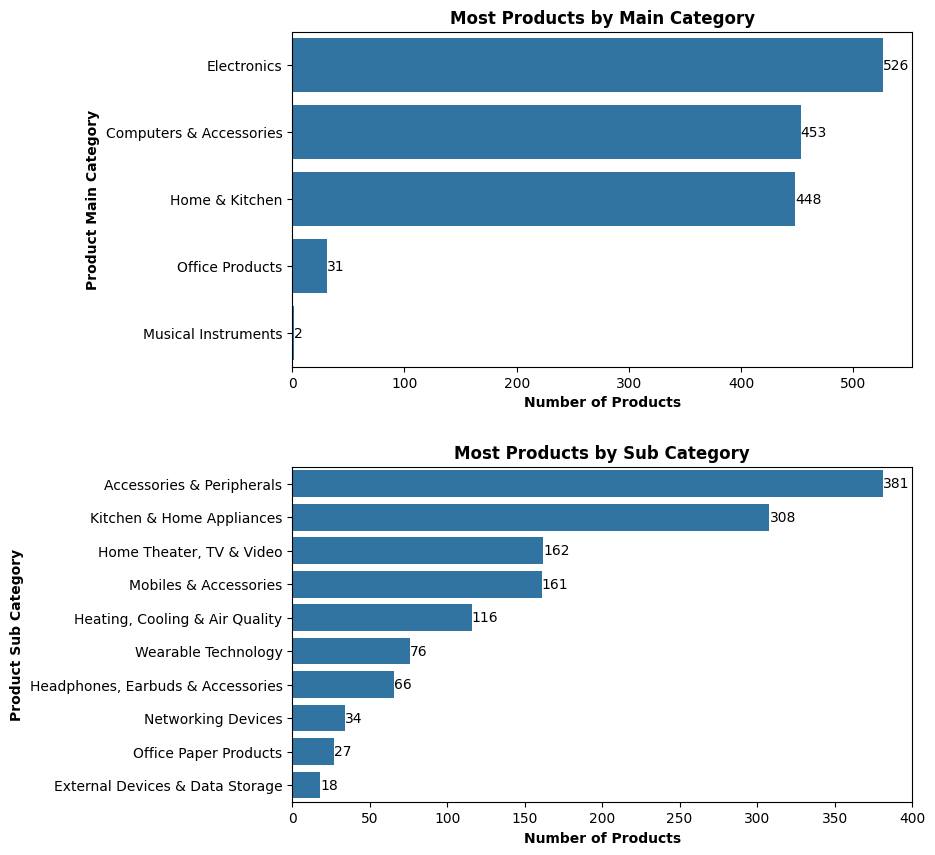

In [23]:
# Most products by Main & Sub category
main_cat_pro = df1['Main category'].value_counts().head(5).rename_axis('Main category').reset_index(name = 'count')
sub_cat_pro = df1['Sub category'].value_counts().head(10).rename_axis('Sub category').reset_index(name = 'count')

fig, ax = plt.subplots(2,1, figsize = (8,10))

sns.barplot(ax=ax[0], data = main_cat_pro, x='count', y='Main category')
sns.barplot(ax=ax[1], data = sub_cat_pro, x='count', y='Sub category')

plt.subplots_adjust(hspace = 0.3)

ax[0].set_xlabel('Number of Products', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')

ax[1].set_xlabel('Number of Products', fontweight='bold')
ax[1].set_ylabel('Product Sub Category', fontweight='bold')

ax[0].set_title('Most Products by Main Category', fontweight='bold')
ax[1].set_title('Most Products by Sub Category', fontweight='bold')


ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

Electronis, Computer & Accessories and Home & Kitchen account for most of the products in this dataset. In general, most products are related to technology and eletronic devices.

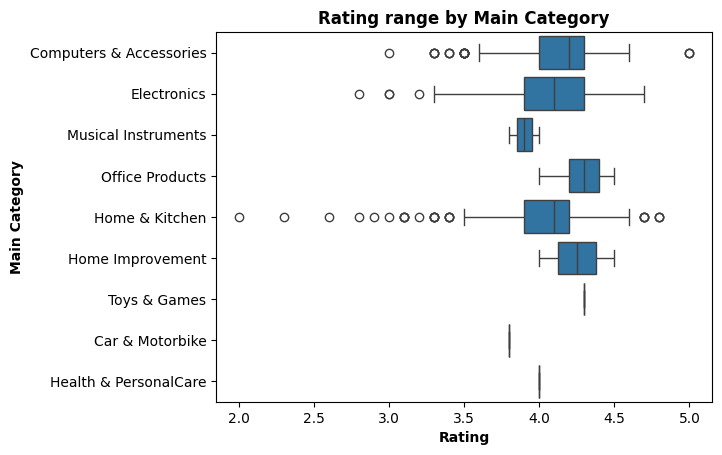

In [24]:
sns.boxplot(data = df1, x='rating', y='Main category')
plt.title('Rating range by Main Category', fontweight = 'bold')
plt.xlabel('Rating', fontweight = 'bold')
plt.ylabel('Main Category', fontweight = 'bold')
plt.show()

The majority of products receive the overall rating at the range around 3.8 and 4.0.
The highest rating is 5.0 coming from Computer & Accessories.
The lowest rating for a product is 2.0 from Home & Kitchen category.

Correlation between numeric variables

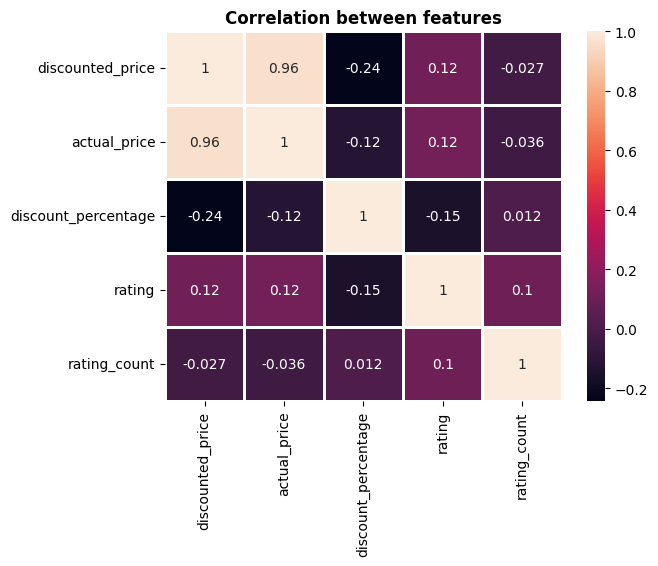

In [25]:
corr = df1.select_dtypes('number').corr()
sns.heatmap(data = corr, annot = True, linewidths = 1)
plt.title('Correlation between features', fontweight = 'bold')
plt.show()

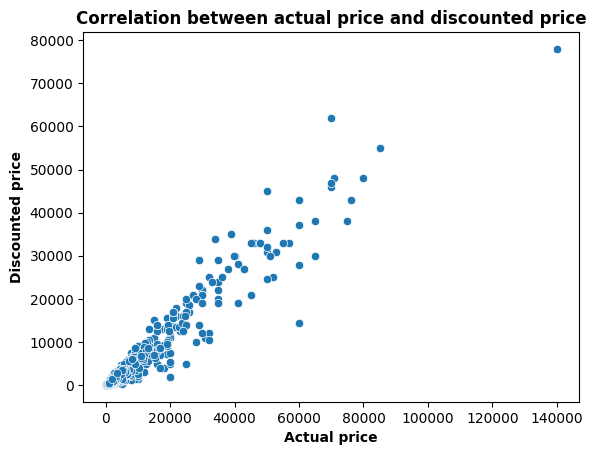

In [26]:
sns.scatterplot(data = df1, x='actual_price', y='discounted_price')
plt.title('Correlation between actual price and discounted price', fontweight = 'bold')
plt.xlabel('Actual price', fontweight = 'bold')
plt.ylabel('Discounted price', fontweight = 'bold')
plt.show()

There is no correlation between features except a strong positive correlation between actual_price and discounted_price.

rating & rating_count

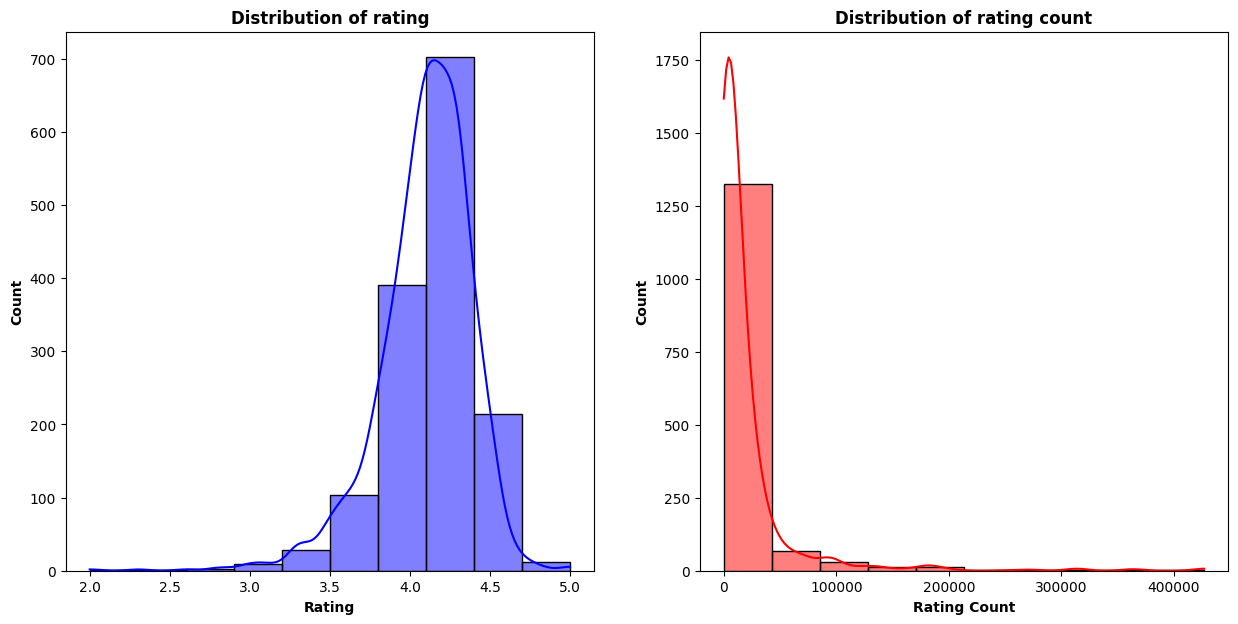

In [27]:
fig, ax = plt.subplots(1,2, figsize = (15,7))


sns.histplot(ax=ax[0],data=df1, x='rating', bins=10, kde=True, color='blue')
sns.histplot(ax=ax[1],data=df1, x='rating_count', bins=10, kde=True, color='red')

ax[0].set_title('Distribution of rating', fontweight='bold')
ax[1].set_title('Distribution of rating count', fontweight='bold')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Rating Count', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')


plt.show()

The rating range of most products is around 3.75 and 4.38. The distribution of rating is left_skewed with no products rated lower than 2.0.
The range of rating_count is really widespread fall from 0 to over 40000. Most products have the amount of rating between 0-5000. The rating_count distribution is strictly right_skewed.



In [28]:
# Create new category column `rating_score`
rating_score = []
for i in df1['rating']:
    if i < 2.0: rating_score.append('Very unsatified')
    elif i < 3.0: rating_score.append('Unsatified')
    elif i < 4.0: rating_score.append('Neutral')
    elif i < 5.0: rating_score.append('Satified')
    elif i == 5.0: rating_score.append('Very satified')

In [29]:
df1['rating_score'] = rating_score
df1['rating_score'] = df1['rating_score'].astype('category')
# Reorder cateories
df1['rating_score'] = df1['rating_score'].cat.reorder_categories(['Unsatified', 'Neutral', 'Satified','Very satified'], ordered=True)
df1.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,Main category,Sub category,rating_score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Satified
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Satified
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Neutral
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Satified
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Satified


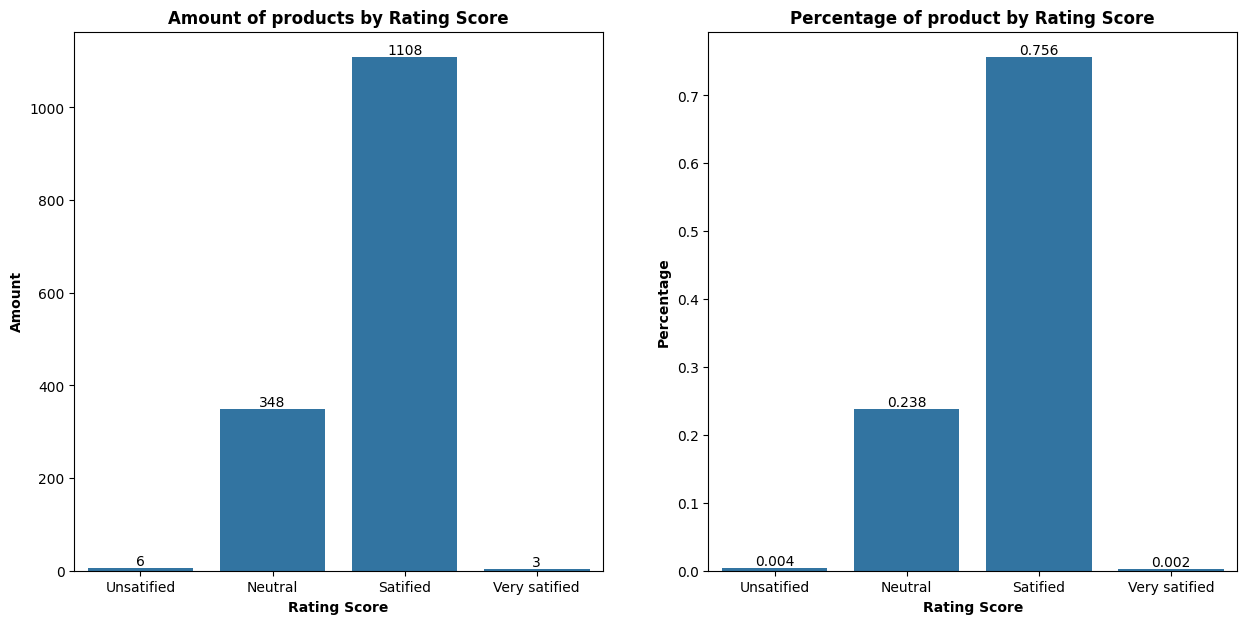

In [30]:
rating_score_pct = df1['rating_score'].value_counts(normalize=True).rename_axis('score').reset_index(name='score_pct')
rating_score_pct['score_pct'] = rating_score_pct['score_pct'].round(3)
fig, ax = plt.subplots(1,2, figsize = (15,7))
sns.countplot(ax=ax[0], data=df1, x='rating_score')
sns.barplot(ax=ax[1],data = rating_score_pct, x='score', y='score_pct')

ax[0].set_title('Amount of products by Rating Score', fontweight = 'bold')
ax[1].set_title('Percentage of product by Rating Score', fontweight = 'bold')

ax[0].set_xlabel('Rating Score', fontweight = 'bold')
ax[1].set_xlabel('Rating Score', fontweight = 'bold')

ax[0].set_ylabel('Amount', fontweight = 'bold')
ax[1].set_ylabel('Percentage', fontweight = 'bold')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])
plt.show()

Over 75% of products listed in the marketplace are rated as 'Satified' by customers. Whereas, only 6 products as well as 0.4% receive 'Unsatified' score.

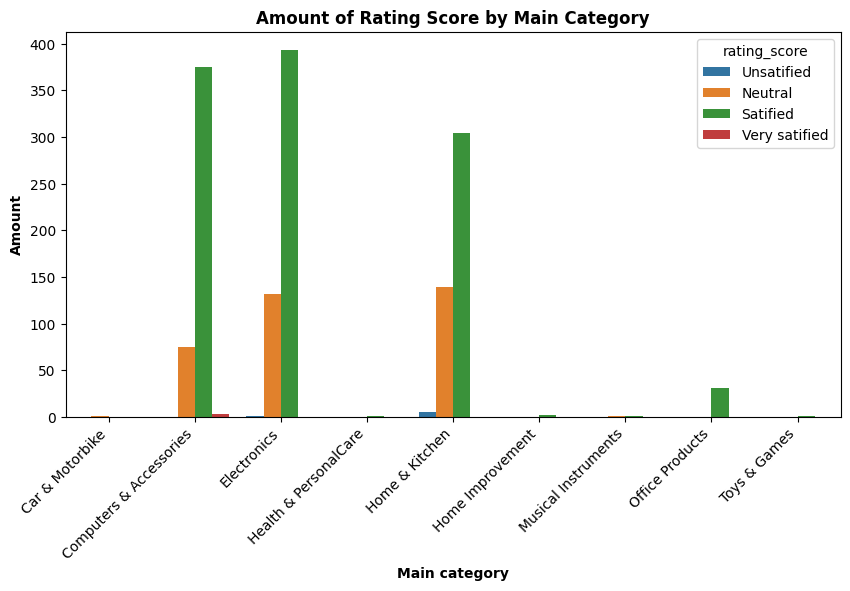

In [31]:
main_rating_score = df1.groupby(['Main category', 'rating_score']).agg('count').iloc[:, -1].rename_axis().reset_index(name='count')
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data = main_rating_score, x='Main category', y='count', hue = 'rating_score')
ax.set_title('Amount of Rating Score by Main Category', fontweight = 'bold')
ax.set_xlabel('Main category', fontweight = 'bold')
ax.set_ylabel('Amount', fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.show()

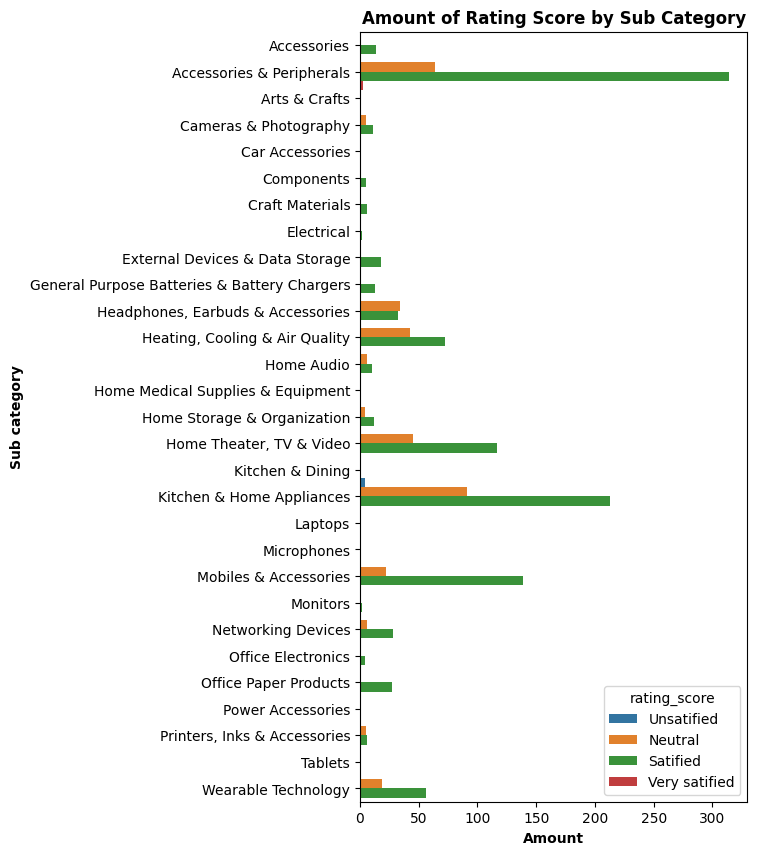

In [32]:
sub_rating_score = df1.groupby(['Sub category', 'rating_score']).agg('count').iloc[:, -1].rename_axis().reset_index(name='count')
fig, ax = plt.subplots(figsize=(5,10))
ax = sns.barplot(data = sub_rating_score, x='count', y='Sub category', hue='rating_score', width = 1.4)
ax.set_title('Amount of Rating Score by Sub Category', fontweight = 'bold')
ax.set_xlabel('Amount', fontweight = 'bold')
ax.set_ylabel('Sub category', fontweight = 'bold')
plt.show()

actual_price , discounted_price and discount_percentage

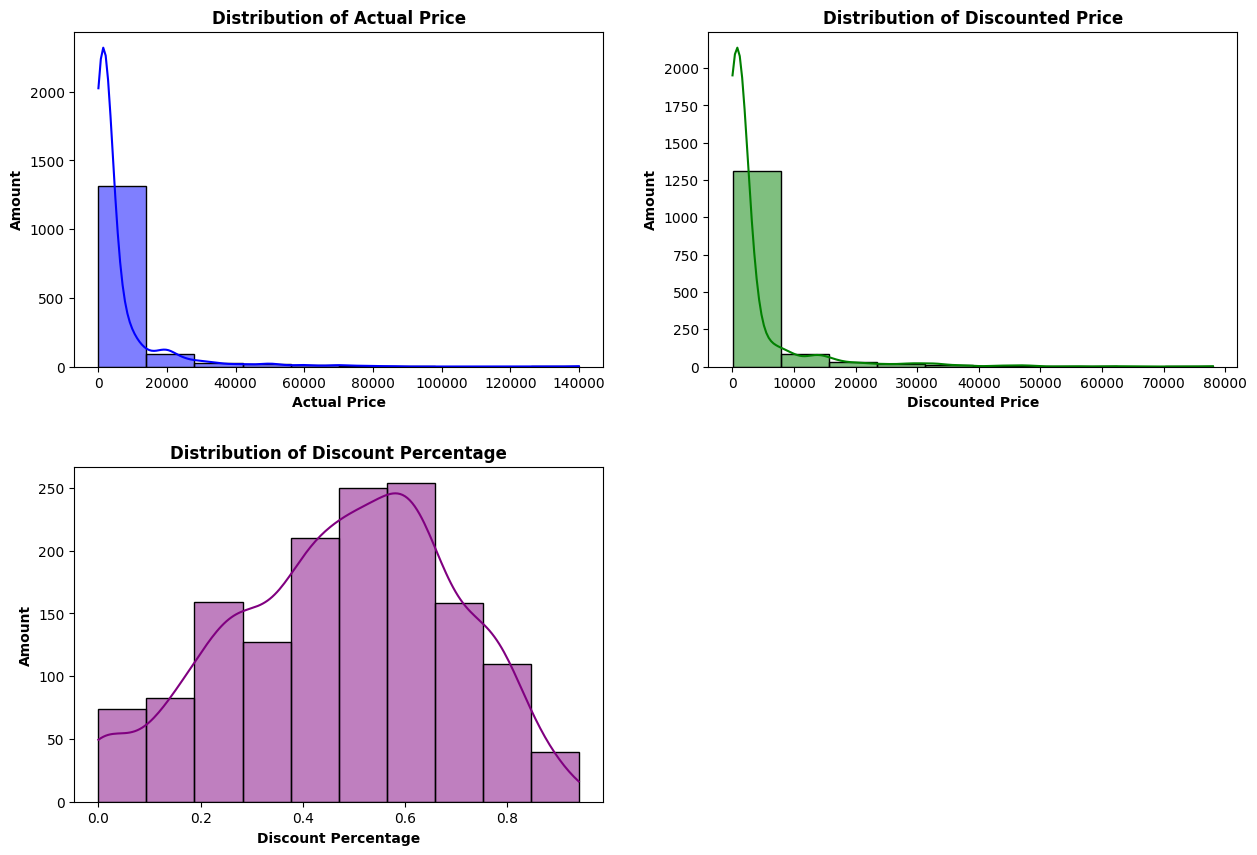

In [33]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
plt.subplots_adjust(hspace = 0.3)

sns.histplot(ax=ax[0,0], data = df1, x='actual_price', bins = 10, kde = True, color = 'blue')
sns.histplot(ax=ax[0,1], data = df1, x='discounted_price', bins = 10, kde = True, color = 'green')
sns.histplot(ax=ax[1,0], data = df1, x='discount_percentage', bins = 10, kde = True, color = 'purple')

ax[0,0].set_title('Distribution of Actual Price', fontweight = 'bold')
ax[0,1].set_title('Distribution of Discounted Price', fontweight = 'bold')
ax[1,0].set_title('Distribution of Discount Percentage', fontweight = 'bold')

ax[0,0].set_xlabel('Actual Price', fontweight = 'bold')
ax[0,1].set_xlabel('Discounted Price', fontweight = 'bold')
ax[1,0].set_xlabel('Discount Percentage', fontweight = 'bold')

ax[0,0].set_ylabel('Amount', fontweight = 'bold')
ax[0,1].set_ylabel('Amount', fontweight = 'bold')
ax[1,0].set_ylabel('Amount', fontweight = 'bold')

ax.flat[-1].set_visible(False)
plt.show()

Both Actual price and Discounted price have a widespread range of distribution, specifically 0-140000 and 0-78000 respectively and both of the 2 graphs are highly right-skewed.
The scale of discount percentage is much more balanced with most of the products having discounts at around 50%-60%.

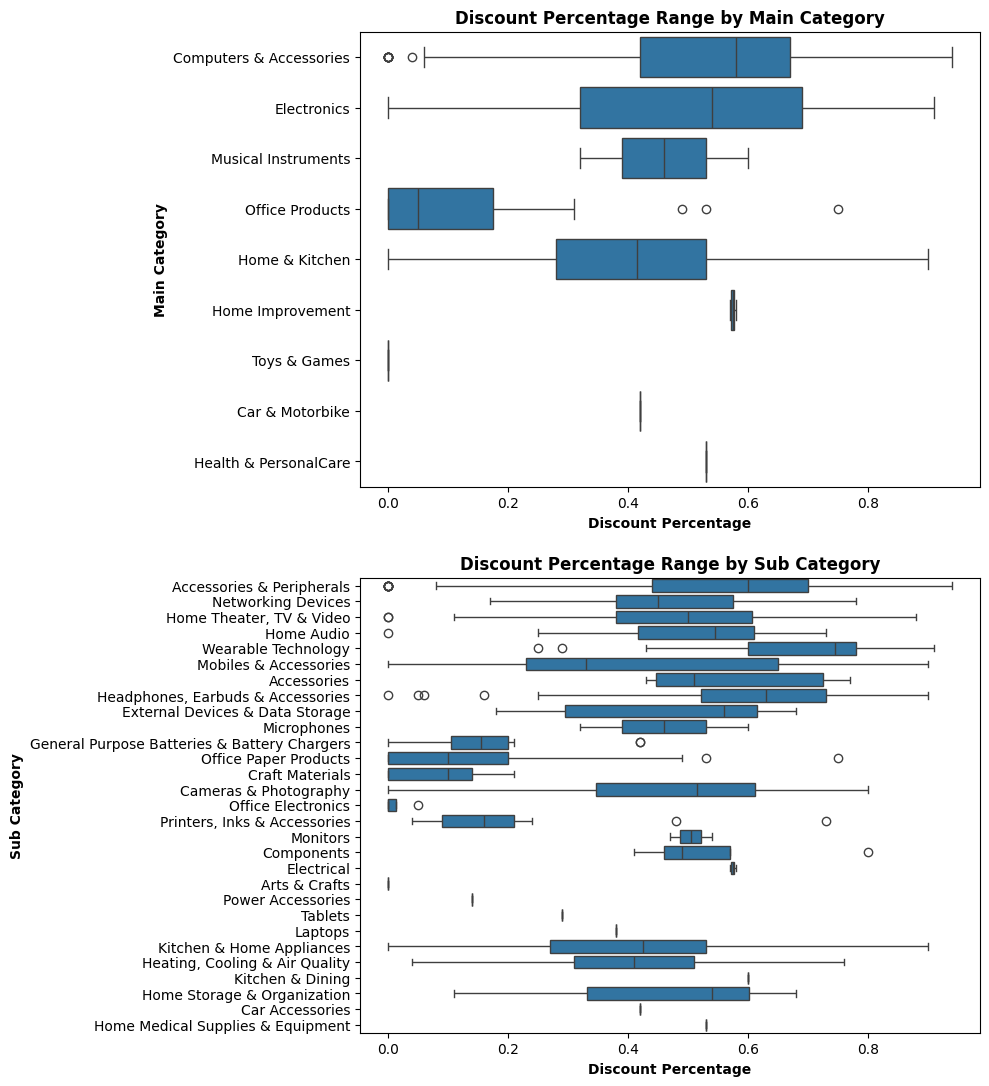

In [34]:
fig, ax = plt.subplots(2,1, figsize = (8,13))
sns.boxplot(ax=ax[0], data = df1, x='discount_percentage', y='Main category')
sns.boxplot(ax=ax[1], data = df1, x='discount_percentage', y='Sub category')

ax[0].set_title('Discount Percentage Range by Main Category', fontweight = 'bold')
ax[1].set_title('Discount Percentage Range by Sub Category', fontweight = 'bold')

ax[0].set_xlabel('Discount Percentage', fontweight = 'bold')
ax[1].set_xlabel('Discount Percentage', fontweight = 'bold')

ax[0].set_ylabel('Main Category', fontweight = 'bold')
ax[1].set_ylabel('Sub Category', fontweight = 'bold')


plt.show()

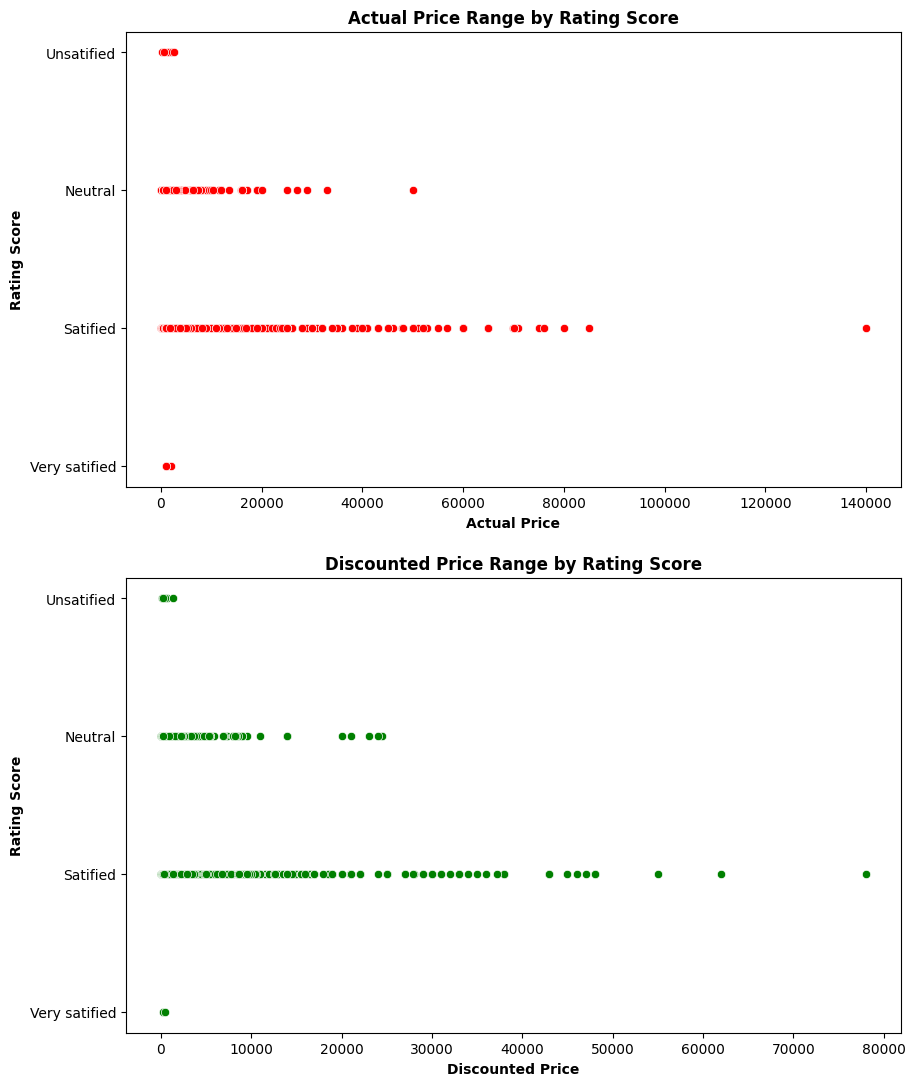

In [35]:
fig, ax = plt.subplots(2,1, figsize = (10,13))
sns.scatterplot(ax = ax[0], data = df1, x = 'actual_price', y = 'rating_score', color = 'red')
sns.scatterplot(ax = ax[1], data = df1, x = 'discounted_price', y = 'rating_score', color ='green')

ax[0].set_title('Actual Price Range by Rating Score', fontweight = 'bold')
ax[1].set_title('Discounted Price Range by Rating Score', fontweight = 'bold')

ax[0].set_xlabel('Actual Price', fontweight = 'bold')
ax[1].set_xlabel('Discounted Price', fontweight = 'bold')

ax[0].set_ylabel('Rating Score', fontweight = 'bold')
ax[1].set_ylabel('Rating Score', fontweight = 'bold')

plt.show()

There is a remarkable change between actual_price and discounted_price in satified-score products.
Most products' actual_price range around 0 - 30000. About discounted_price, most products' price falls under 20000 after discounts.

Machine Learning

Price Prediction

Features Selection

In [36]:
# Check for null value
df1.isnull().sum()

product_id             0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
Main category          0
Sub category           0
rating_score           0
dtype: int64

In [37]:
# Fill null value
df1['rating_count'].fillna(df1['rating_count'].mode()[0], inplace=True)

In [38]:
X1 = df1[['rating', 'rating_count', 'actual_price']]
y1 = df1['discounted_price']

In [39]:
# Apply model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)
lr_model = LinearRegression()
lr_model.fit(X1_train, y1_train)

y1_pred = lr_model.predict(X1_test)

Linear Regression

In [40]:
# Calculating Intercept, Coefficient, R Squared Value
from sklearn.metrics import r2_score

print('Linear Regression Intercept: ',lr_model.intercept_)
print('Linear Regression Coefficient: ',lr_model.coef_)
print('R2 Score: ', r2_score(y1_test, y1_pred))

Linear Regression Intercept:  -767.0260870542106
Linear Regression Coefficient:  [1.21585346e+02 1.16433607e-03 6.21259688e-01]
R2 Score:  0.8997763410500292


In [61]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
linear_regression = LinearRegression()

# Fit the model to the training data
linear_regression.fit(X2_train, y2_train)

# Make predictions on the test data
linear_regression_pred = linear_regression.predict(X2_test)

# Calculate and print the Linear Regression score on the test data
print('Linear Regression score:', linear_regression.score(X2_test, y2_test))


Linear Regression score: 0.9125017102273477


Apply scaler

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X2 = df1[['rating', 'rating_count', 'actual_price']]
y2 = df1['discounted_price']

X2 = scaler.fit_transform(X2)

In [42]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

lr_model.fit(X2_train, y2_train)

y2_pred = lr_model.predict(X2_test)
print('R2 Score:', r2_score(y2_test, y2_pred))

R2 Score: 0.9125017102273477


Lasso

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X2_train, y2_train)

lasso_pred = lasso.predict(X2_test)

print('Lasso coefficients: ',lasso.coef_)
print('Lasso score: ',lasso.score(X2_test, y2_test))

Lasso coefficients:  [  20.33892622   59.12027405 6628.84064867]
Lasso score:  0.9125010462543065


Ridge

In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)

ridge.fit(X2_train, y2_train)
ridge_pred = ridge.predict(X2_test)
print('Ridge score: ',ridge.score(X2_test, y2_test))

Ridge score:  0.9124968021628038


Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the Decision Tree regressor with desired hyperparameters
decision_tree = DecisionTreeRegressor(max_depth=5)

# Fit the model to the training data
decision_tree.fit(X2_train, y2_train)

# Make predictions on the test data
decision_tree_pred = decision_tree.predict(X2_test)

# Calculate and print the Decision Tree score on the test data
print('Decision Tree score:', decision_tree.score(X2_test, y2_test))


Decision Tree score: 0.8527706784508943


Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the Gradient Boosting regressor with desired hyperparameters
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gradient_boosting.fit(X2_train, y2_train)

# Make predictions on the test data
gradient_boosting_pred = gradient_boosting.predict(X2_test)

# Calculate and print the Gradient Boosting score on the test data
print('Gradient Boosting score:', gradient_boosting.score(X2_test, y2_test))


Gradient Boosting score: 0.9129561235982017


Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest regressor with desired hyperparameters
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest.fit(X2_train, y2_train)

# Make predictions on the test data
random_forest_pred = random_forest.predict(X2_test)

# Calculate and print the Random Forest score on the test data
print('Random Forest score:', random_forest.score(X2_test, y2_test))


Random Forest score: 0.9194173390202354


Random Forest Has the Best Score

Support Vector Machine (SVM)

In [63]:
from sklearn.svm import SVR

# Instantiate the SVM regressor with desired hyperparameters
svm = SVR(kernel='rbf', C=100, gamma='auto')

# Fit the model to the training data
svm.fit(X2_train, y2_train)

# Make predictions on the test data
svm_pred = svm.predict(X2_test)

# Calculate and print the SVM score on the test data
print('SVM score:', svm.score(X2_test, y2_test))


SVM score: 0.2545969692547031


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=5)
}

# Perform cross-validation and evaluate models
for name, model in models.items():
    scores = cross_val_score(model, X2_train, y2_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} - MSE: {scores.mean():.4f} (+/- {scores.std():.4f})")


Linear Regression - MSE: -3272356.3390 (+/- 1504016.7958)
SVR - MSE: -50278395.3915 (+/- 16616037.9069)
Random Forest - MSE: -2703544.5692 (+/- 1157053.4183)
Gradient Boosting - MSE: -3209147.5059 (+/- 1963609.5122)
Decision Tree - MSE: -3764868.5736 (+/- 1475925.0741)
